# Businees Problem

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [5]:
df = pd.read_csv("student_info.csv")

In [6]:
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [7]:
df.shape

(200, 2)

#Discover and Visualize the Data to gain insight

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [16]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


##visualize

Text(0.5, 1.0, 'Student Study Hours vs Student marks')

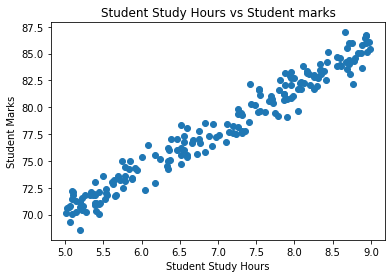

In [19]:
plt.scatter(x=df.study_hours, y=df.student_marks)
plt.xlabel("Student Study Hours")
plt.ylabel("Student Marks")
plt.title("Student Study Hours vs Student marks")

#PrePare Data For Machine Learning algorithm 

##Data Cleaning

In [21]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [22]:
#mean of data
df.mean()

study_hours       6.995949
student_marks    77.933750
dtype: float64

In [25]:
#fill mean value in null value in dataFrame
df = df.fillna(df.mean())

In [26]:
# checking again missing value
df.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [28]:
df.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


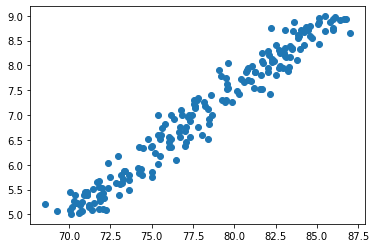

In [40]:
plt.scatter(x = df.student_marks, y =df.study_hours )

### Splitting DataSet

In [30]:
X = df.drop("student_marks",axis="columns")
y = df.drop("study_hours", axis = "columns")

In [31]:
print("X Shape:",X.shape,"\ny Shape: ",y.shape)

X Shape: (200, 1) 
y Shape:  (200, 1)


### Training and Test data

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51)


In [39]:
print("X_Train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_Train:  (160, 1)
y_train:  (160, 1)
X_test:  (40, 1)
y_test (40, 1)


### Select a model and train it

In [41]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
lr.score(X_test,y_test)

0.9514124242154466

In [47]:
lr.predict([[4]])[0][0].round(2)

66.19

In [48]:
y_pred = lr.predict(X_test)
y_pred

array([[83.11381458],
       [78.9025963 ],
       [84.57003024],
       [85.82946001],
       [84.72745896],
       [80.75238377],
       [72.84159055],
       [71.66087515],
       [73.23516235],
       [71.66087515],
       [73.47130543],
       [76.38373677],
       [73.23516235],
       [73.58937697],
       [82.95638585],
       [70.40144538],
       [73.23516235],
       [78.74516758],
       [75.55723598],
       [82.68088559],
       [76.65923703],
       [70.48015974],
       [74.77009238],
       [77.98143645],
       [85.59331693],
       [82.56281405],
       [76.42309395],
       [85.0423164 ],
       [78.39095296],
       [81.38209865],
       [81.73631327],
       [83.15317176],
       [82.20859943],
       [81.10659839],
       [73.58937697],
       [71.1492318 ],
       [71.89701823],
       [81.53952737],
       [72.60544747],
       [71.93637541]])

In [51]:
# comparing predictive and orignal value
pd.DataFrame(np.c_[X_test, y_test, y_pred.round(2)], columns =["Study hours","student marks orignal","student predictive marks "])

,Study hours,student marks orignal,student predictive marks
0,8.300000,82.02,83.11
1,7.230000,77.55,78.90
2,8.670000,84.19,84.57
3,8.990000,85.46,85.83
4,8.710000,84.03,84.73
5,7.700000,80.81,80.75
6,5.690000,73.61,72.84
7,5.390000,70.90,71.66
8,5.790000,73.14,73.24
9,5.390000,73.02,71.66


###Saving Model

In [52]:
import joblib
joblib.dump(lr, "Student Marks Predector.pkl")

['Student Marks Predector.pkl']

In [54]:
model = joblib.load("Student Marks Predector.pkl")

In [63]:
model.predict([[4]])[0][0].round(2)

66.19